In [1]:
import sys
sys.path.append("../")  # import path starts with src/
from preprocessing.create_train_test_dicts import build_splits
from preprocessing.knn_preprocess import populate_skew_for_knn, dict_to_xy

from scripts.knn_param_search import explore_knn, summarize_results

data = build_splits()
train_split = data["train_numeric"]
val_split = data["val_numeric"]

results = explore_knn(
    train_dict=train_split,
    val_dict=val_split,
    target_label="disgust",
    pca_dims=[50, 100, 150, 200],   # try many PCA dimensions
    k_values=range(1, 31),
)

summarize_results(results)




=== Running KNN search for UNBALANCED (pca=50), PCA=50 ===
k= 1 | Val accuracy = 0.3855
k= 2 | Val accuracy = 0.3855
k= 3 | Val accuracy = 0.3843
k= 4 | Val accuracy = 0.3922
k= 5 | Val accuracy = 0.3944
k= 6 | Val accuracy = 0.3933
k= 7 | Val accuracy = 0.3958
k= 8 | Val accuracy = 0.3992
k= 9 | Val accuracy = 0.3955
k=10 | Val accuracy = 0.3955
k=11 | Val accuracy = 0.3974
k=12 | Val accuracy = 0.3944
k=13 | Val accuracy = 0.3943
k=14 | Val accuracy = 0.3900
k=15 | Val accuracy = 0.3911
k=16 | Val accuracy = 0.3887
k=17 | Val accuracy = 0.3907
k=18 | Val accuracy = 0.3879
k=19 | Val accuracy = 0.3875
k=20 | Val accuracy = 0.3851
k=21 | Val accuracy = 0.3845
k=22 | Val accuracy = 0.3841
k=23 | Val accuracy = 0.3844
k=24 | Val accuracy = 0.3850
k=25 | Val accuracy = 0.3840
k=26 | Val accuracy = 0.3836
k=27 | Val accuracy = 0.3836
k=28 | Val accuracy = 0.3830
k=29 | Val accuracy = 0.3799
k=30 | Val accuracy = 0.3818

Best k: 8 with accuracy 0.3992


=== Running KNN search for UNBALANCE

In [8]:
balanced_train_dict = populate_skew_for_knn(
    train_dict=train_split,
    target_label="disgust"
)

X_train_unbalanced, Y_train_unbalanced = dict_to_xy(train_split)
X_train_balanced, y_train = dict_to_xy(balanced_train_dict)
X_val, y_val = dict_to_xy(val_split)
print(X_train_balanced.shape)
print(y_train.shape)

(26613, 2304)
(26613,)


In [9]:
from sklearn.decomposition import PCA

# Reduce to 150 components 
pca_unbalanced = PCA(n_components=150, whiten=True, random_state=42) 
pca_balanced = PCA(n_components=150, whiten=True, random_state=42)

pca_balanced.fit(X_train_balanced)  # FIT ONLY ON TRAIN
pca_unbalanced.fit(X_train_unbalanced)

X_train_balanced_pca = pca_balanced.transform(X_train_balanced)
X_train_unbalanced_pca = pca_unbalanced.transform(X_train_unbalanced)

X_val_balanced_pca  = pca_balanced.transform(X_val)
X_val_unbalanced_pca = pca_unbalanced.transform(X_val)

X_train_balanced_pca.shape


(26613, 150)

In [10]:
from scripts.knn_param_search import evaluate_k_values, plot_k_scores
best_k, best_val_acc, all_scores = evaluate_k_values(
    X_train_balanced_pca, y_train,
    X_val_balanced_pca,   y_val,
    k_values=range(1, 31),   # try k from 1 to 30
    weights="distance"
)


k= 1 | Val accuracy = 0.3323
k= 2 | Val accuracy = 0.3323
k= 3 | Val accuracy = 0.3238
k= 4 | Val accuracy = 0.3188
k= 5 | Val accuracy = 0.3099
k= 6 | Val accuracy = 0.3118
k= 7 | Val accuracy = 0.3070
k= 8 | Val accuracy = 0.3047
k= 9 | Val accuracy = 0.3003
k=10 | Val accuracy = 0.3010
k=11 | Val accuracy = 0.2987
k=12 | Val accuracy = 0.2958
k=13 | Val accuracy = 0.2903
k=14 | Val accuracy = 0.2908
k=15 | Val accuracy = 0.2882
k=16 | Val accuracy = 0.2900
k=17 | Val accuracy = 0.2891
k=18 | Val accuracy = 0.2894
k=19 | Val accuracy = 0.2909
k=20 | Val accuracy = 0.2889
k=21 | Val accuracy = 0.2866
k=22 | Val accuracy = 0.2855
k=23 | Val accuracy = 0.2834
k=24 | Val accuracy = 0.2812
k=25 | Val accuracy = 0.2831
k=26 | Val accuracy = 0.2826
k=27 | Val accuracy = 0.2780
k=28 | Val accuracy = 0.2774
k=29 | Val accuracy = 0.2804
k=30 | Val accuracy = 0.2819

Best k (validation-based): 1 with accuracy 0.3323


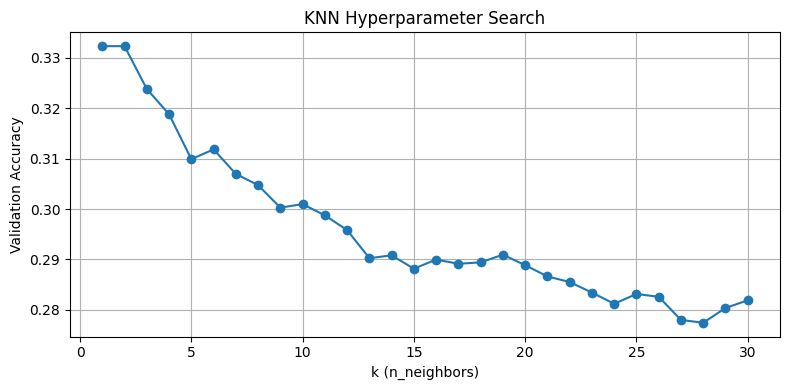

In [11]:
plot_k_scores(all_scores)

In [12]:
best_k, best_val_acc, all_scores = evaluate_k_values(
    X_train_unbalanced_pca, Y_train_unbalanced,
    X_val_unbalanced_pca,   y_val,
    k_values=range(1, 31),   # try k from 1 to 30
    weights="distance"
)


k= 1 | Val accuracy = 0.3384
k= 2 | Val accuracy = 0.3384
k= 3 | Val accuracy = 0.3301
k= 4 | Val accuracy = 0.3234
k= 5 | Val accuracy = 0.3213
k= 6 | Val accuracy = 0.3180
k= 7 | Val accuracy = 0.3169
k= 8 | Val accuracy = 0.3152
k= 9 | Val accuracy = 0.3125
k=10 | Val accuracy = 0.3123
k=11 | Val accuracy = 0.3097
k=12 | Val accuracy = 0.3068
k=13 | Val accuracy = 0.3049
k=14 | Val accuracy = 0.3035
k=15 | Val accuracy = 0.3052
k=16 | Val accuracy = 0.3050
k=17 | Val accuracy = 0.3036
k=18 | Val accuracy = 0.3003
k=19 | Val accuracy = 0.2968
k=20 | Val accuracy = 0.2943
k=21 | Val accuracy = 0.2923
k=22 | Val accuracy = 0.2932
k=23 | Val accuracy = 0.2918
k=24 | Val accuracy = 0.2909
k=25 | Val accuracy = 0.2886
k=26 | Val accuracy = 0.2889
k=27 | Val accuracy = 0.2916
k=28 | Val accuracy = 0.2876
k=29 | Val accuracy = 0.2838
k=30 | Val accuracy = 0.2855

Best k (validation-based): 1 with accuracy 0.3384


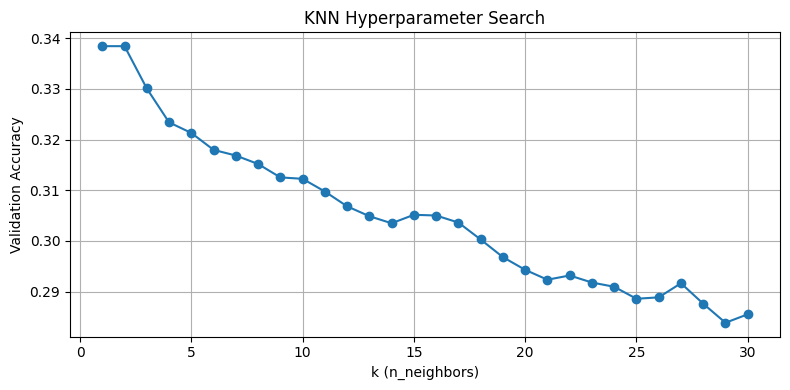

In [13]:
plot_k_scores(all_scores)